<a href="https://colab.research.google.com/github/AlekseyS17/Labs/blob/main/Lab3_Safrygin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №3

Частотный анализ

Цель: Ознакомиться с методами частотного анализа из библиотеки MLxtend

Выполнение:


Для выполнения лаб. работы необходимо установить библиотеку MLxtend

In [63]:
pip install mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Загрузка данных
1. Загрузить датасет по ссылке: https://www.kaggle.com/acostasg/random-shopping-cart .
Данные представлены в виде csv таблицы. Данные представляют собой информацию о том,
какой покупатель что и когда покупал. В данной лаб. работе не будем использовать данные
о дате покупки.

2. Создать Python скрипт. Загрузить данные в датафрейм.

In [3]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

all_data = pd.read_csv('dataset_group.csv',header=None)
#В файле нет строки с названием столбцов, поэтому параметр header равен None.
#Интерес представляет информация об id покупателя - столбец с названием 1
#Название купленного товара хранится в столбце с названием 2

Saving dataset_group.csv to dataset_group.csv


3. Получим список всех id покупателей, которые есть в файле.

In [4]:
unique_id = list(set(all_data[1]))
print(f'Список id - {unique_id}') #Выведем список всех id
print(f'Количество id : {len(unique_id)}') #Выведем количество id

Список id - [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 

4. Получим список всех товаров, которые есть в файле.

In [5]:
items = list(set(all_data[2]))
print(f'Список товаров - {items}') #Выведем список всех товаров
print(f'Количество товаров : {len(items)}')#Выведем количество товаров


Список товаров - ['coffee/tea', 'beef', 'pork', 'soda', 'all- purpose', 'poultry', 'waffles', 'butter', 'sandwich bags', 'laundry detergent', 'soap', 'dishwashing liquid/detergent', 'hand soap', 'fruits', 'vegetables', 'tortillas', 'pasta', 'toilet paper', 'yogurt', 'sandwich loaves', 'flour', 'ketchup', 'ice cream', 'lunch meat', 'spaghetti sauce', 'milk', 'cereals', 'paper towels', 'sugar', 'bagels', 'mixes', 'aluminum foil', 'eggs', 'cheeses', 'individual meals', 'shampoo', 'juice', 'dinner rolls']
Количество товаров : 38


5. Далее необходимо сформировать датасет подходящий для частотного анализа. Для этого
надо слить все товары одного покупателя в один список. Для дальнейшего частотного
анализа id покупателя будет не нужен


In [6]:
dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
items] for id in unique_id]

# Подготовка данны

1. Так как полученные датасет не пригоден для анализа напрямую, так как каждый список
пользователя может содержать разное количество товаров. Поэтому данные надо
закодировать так, чтобы их можно было представить в виде матрицы. Для кодированния
данных используем TransactionEncoder

In [7]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)


**TransactionEncoder** позволил преобразовать список элементов в данные транзакций для частотного анализа набора элементов.

2. Выведите полученный dataframe и объясните, как стали представляться данные

In [8]:
print(df)

      all- purpose  aluminum foil  bagels   beef  butter  cereals  cheeses  \
0             True           True   False   True    True    False    False   
1            False           True   False  False   False     True     True   
2            False          False    True  False   False     True     True   
3             True          False   False  False   False     True    False   
4             True          False   False  False   False    False    False   
...            ...            ...     ...    ...     ...      ...      ...   
1134          True          False   False   True   False     True     True   
1135         False          False   False  False   False     True     True   
1136         False          False    True   True   False    False    False   
1137          True          False   False   True   False    False     True   
1138         False          False   False  False   False    False    False   

      coffee/tea  dinner rolls  dishwashing liquid/detergent  .

Данные стали представлясться в виде таблицы размерностью 1139 строк(id покупателей) и 38 столбцов(категории товаров). Каждый покупатель иммеет свою корзину покупок и в таблице в формате TRUE и FALSE указано какой товар присутствует в корзине. TRUE - товар в корзине покупателя, FALSE - товара нет в корзине покупателя. Однако в таблице не указываются повторяющиеся категории товаров в корзине одного покупателя. Например, у покупателя под номером id = 0 в корзине имеются две категории all- purpose(универсальность), но в таблице указывается только наличие этой категории.

# Ассоциативный анализ с использованием алгоритма Apriori


1. Применим алгоритм apriori с минимальным уровнем поддержки 0.3

In [9]:
from mlxtend.frequent_patterns import apriori
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x)) #добавление размера набора
print(results)

     support                                    itemsets  length
0   0.374890                              (all- purpose)       1
1   0.384548                             (aluminum foil)       1
2   0.385426                                    (bagels)       1
3   0.374890                                      (beef)       1
4   0.367867                                    (butter)       1
5   0.395961                                   (cereals)       1
6   0.390694                                   (cheeses)       1
7   0.379280                                (coffee/tea)       1
8   0.388938                              (dinner rolls)       1
9   0.388060              (dishwashing liquid/detergent)       1
10  0.389816                                      (eggs)       1
11  0.352941                                     (flour)       1
12  0.370500                                    (fruits)       1
13  0.345917                                 (hand soap)       1
14  0.398595             

При помощи алгоритма apriori получилось вывести перечень товаровов при минимальной поддержке 0.3(30% от общего числа транзакций). Например, vegetables (овощи) из числа всех транзакций встречается в 73.9% случаях в корзинах покупателей, тем самым является одним из самых продаваемых категорий среди всех товара. А набор из двух категорий, такой как poultry, vegetables (птицеводство и овощи) встречается в корзинах с вероятностью 33%.

2. Применим алгоритм apriori с тем же уровнем поддержки, но ограничим максимальный
размер набора единицей

In [10]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.374890                  (all- purpose)
1   0.384548                 (aluminum foil)
2   0.385426                        (bagels)
3   0.374890                          (beef)
4   0.367867                        (butter)
5   0.395961                       (cereals)
6   0.390694                       (cheeses)
7   0.379280                    (coffee/tea)
8   0.388938                  (dinner rolls)
9   0.388060  (dishwashing liquid/detergent)
10  0.389816                          (eggs)
11  0.352941                         (flour)
12  0.370500                        (fruits)
13  0.345917                     (hand soap)
14  0.398595                     (ice cream)
15  0.375768              (individual meals)
16  0.376646                         (juice)
17  0.371378                       (ketchup)
18  0.378402             (laundry detergent)
19  0.395083                    (lunch meat)
20  0.380158                          (milk)
21  0.3757

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


В данной таблице приведены товары с максимальный набором 1, то есть все категории и их вероятность нахождения в покупательских корзинах.

3. Применим алгоритм apriori и выведем только те наборы, которые имеют размер 2, а также
количество таких наборов

In [11]:
results = apriori(df, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(results)
print('\nКол-во транзакций = ',len(results))

     support                                    itemsets  length
38  0.310799                 (aluminum foil, vegetables)       2
39  0.300263                        (vegetables, bagels)       2
40  0.310799                       (vegetables, cereals)       2
41  0.309043                       (vegetables, cheeses)       2
42  0.308165                  (vegetables, dinner rolls)       2
43  0.306409  (vegetables, dishwashing liquid/detergent)       2
44  0.326602                          (eggs, vegetables)       2
45  0.302897                     (vegetables, ice cream)       2
46  0.309043             (vegetables, laundry detergent)       2
47  0.311677                    (vegetables, lunch meat)       2
48  0.331870                       (vegetables, poultry)       2
49  0.305531                          (vegetables, soda)       2
50  0.315189                       (vegetables, waffles)       2
51  0.319579                        (vegetables, yogurt)       2

Кол-во транзакций =  14


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


В данной таблице приведены товары с максимальный набором 2 и вероятность их
нахождения в покупательских корзинах.

4. Посчитайте количество наборов при различных уровнях поддержки. Начальное значение
поддержки 0.05, шаг 0.01. Постройте график зависимости количества наборов от уровня
поддержки

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


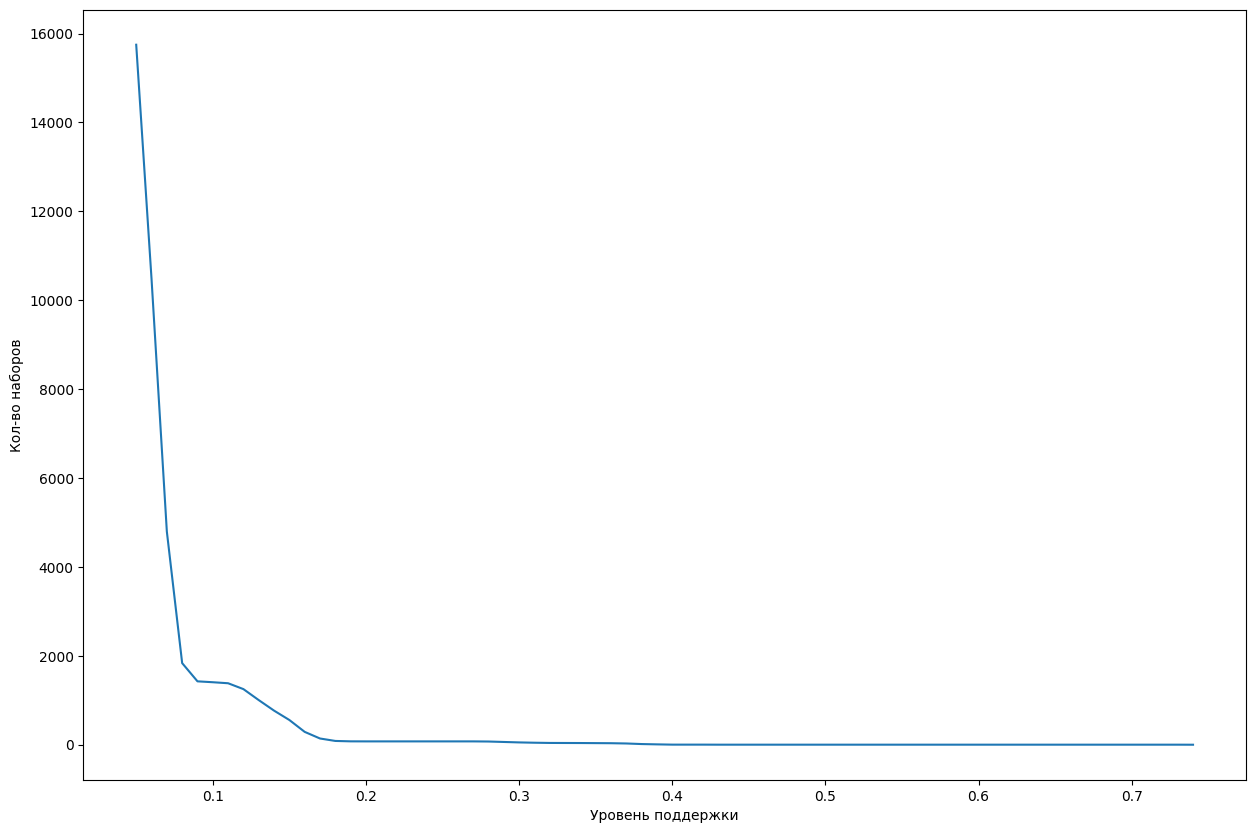

In [12]:
import matplotlib.pyplot as plt

min_support_range = np.arange(0.05, 0.75, 0.01)

itemsets_lenghts = []
for min_support in min_support_range:
    res = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_lenghts.append(len(res))

plt.figure(figsize=(15, 10))
plt.xlabel('Уровень поддержки')
plt.ylabel('Кол-во наборов')
plt.plot(min_support_range.tolist(), itemsets_lenghts)
plt.show()


Примерно из 15750 транзакций, при поддержке min_support = 0,05(5%), существует набор(корзина) из n категорий. При поддержке min_support = 0,3(30%), количество транзакций состваляет 52, включающих в себя наборы из 1-2 товаров(исходя из таблицы) и на графике это можно увидеть.

5. Определите значение уровня поддержки при котором перестают генерироваться наборы
размера 1,2,3, и.т.д. Отметьте полученные уровни поддержки на графике построенном в
пункте 4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


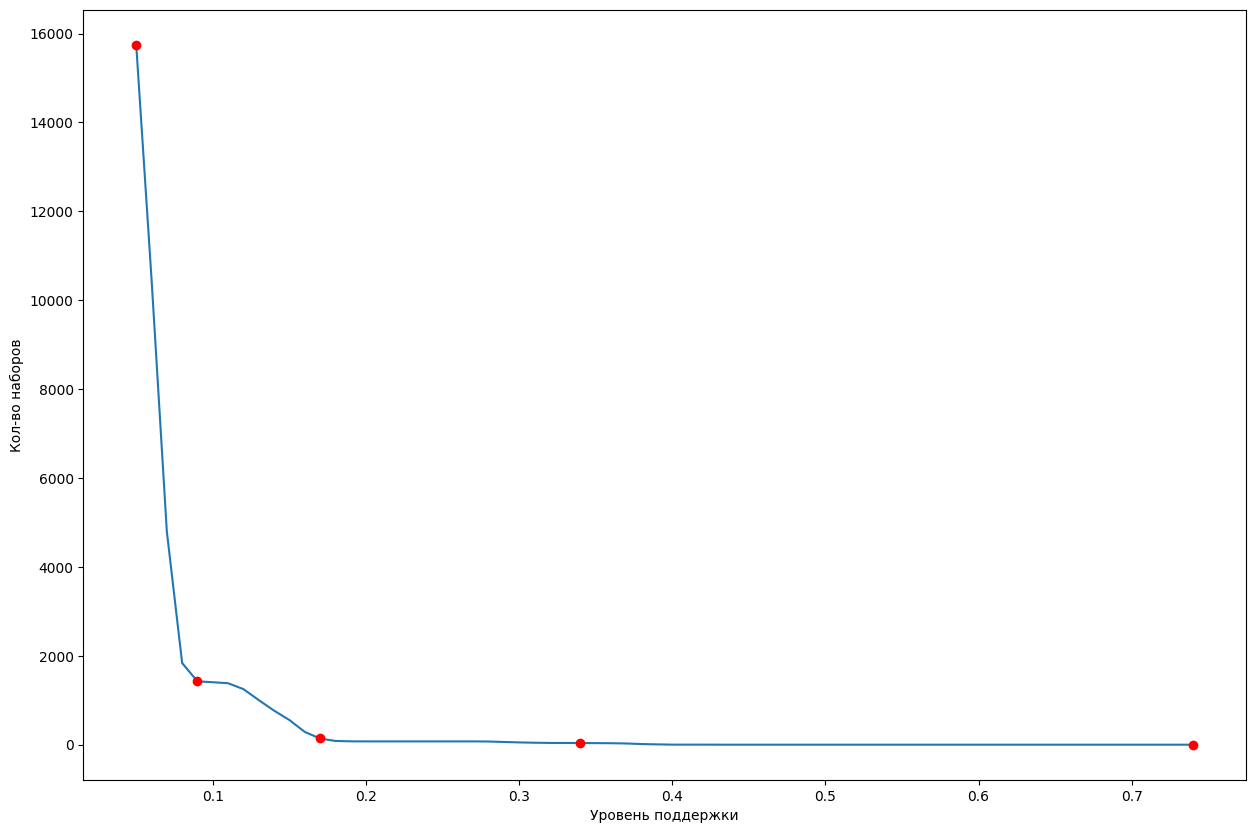

In [13]:
from math import isnan

itemsets_lenghts = []
minimum_supports = []
minimum_lenghts = []

last_itemset_len = len(df.columns)

for min_support in min_support_range:
    res = apriori(df, min_support=min_support, use_colnames=True)
    itemsets_lenghts.append(len(res))

    res['lenght'] = res['itemsets'].apply(lambda x: len(x))
    current_itemset_max_len = res['lenght'].max()

    if isnan(current_itemset_max_len):
      current_itemset_max_len = 0

    if current_itemset_max_len < last_itemset_len:
      last_itemset_len = current_itemset_max_len
      minimum_supports.append(min_support)
      minimum_lenghts.append(len(res))

plt.figure(figsize=(15, 10))
plt.xlabel('Уровень поддержки')
plt.ylabel('Кол-во наборов')
plt.plot(min_support_range.tolist(), itemsets_lenghts)
plt.plot(minimum_supports, minimum_lenghts, 'ro')
plt.show()

Ориентируясь по графику спрва - налево по указанным точкам и используя таблицу, полученную в пункте 1, можно сделать вывод о том, что между 1 и 2 точкой генерируются набор из 1 количества товара, между точками 2 и 3 генерируются наборы из 2 товаров. Между точками 3 и 4 наборы из 3 товаров и между точками 4 и 5 наборы из 4 товаров

6. Построим датасет только из тех элементов, которые попадают в наборы размером 1 при
уровне поддержки 0.38

In [20]:
results = apriori(df, min_support=0.38, use_colnames=True, max_len=1)
new_items = [ list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in all_data[all_data[1] == id][2] if elem in
new_items] for id in unique_id]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Миниммальный уровень поддержи - min_support=0.38

---
Набор состоит из одного товара - max_len=1


7. Приведите полученный датасет к формату, который можно обработать


In [21]:
te = TransactionEncoder()
te_ary = te.fit(new_dataset).transform(new_dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)

      aluminum foil  bagels  cereals  cheeses  dinner rolls  \
0              True   False    False    False          True   
1              True   False     True     True         False   
2             False    True     True     True          True   
3             False   False     True    False         False   
4             False   False    False    False          True   
...             ...     ...      ...      ...           ...   
1134          False   False     True     True          True   
1135          False   False     True     True          True   
1136          False    True    False    False          True   
1137          False   False    False     True         False   
1138          False   False    False    False         False   

      dishwashing liquid/detergent   eggs  ice cream  lunch meat   milk  \
0                            False  False       True        True  False   
1                             True  False      False       False   True   
2                 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Была сформирована таблица размерностью 1139 строк(id покупателей) и 15 столбцов(категории товаров). В данной таблице уменьшилось кол-во товаров, так как их вероятность попадания в покупательские корзины(наборы) < 38%

8. Проведите ассоциативный анализ при уровне поддержки 0.3 для нового датасета. Опишите
в чем сходства и различия

In [16]:
results = apriori(df, min_support=0.3, use_colnames=True, max_len=1)
print(results)

     support                        itemsets
0   0.384548                 (aluminum foil)
1   0.385426                        (bagels)
2   0.395961                       (cereals)
3   0.390694                       (cheeses)
4   0.388938                  (dinner rolls)
5   0.388060  (dishwashing liquid/detergent)
6   0.389816                          (eggs)
7   0.398595                     (ice cream)
8   0.395083                    (lunch meat)
9   0.380158                          (milk)
10  0.421422                       (poultry)
11  0.390694                          (soda)
12  0.739245                    (vegetables)
13  0.394205                       (waffles)
14  0.384548                        (yogurt)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Аналогично при помощи алгоритма apriori получилось вывести перечень товаровов при минимальной поддержке 0.3(30% от общего числа транзакций). Минимальный набор в который входит 1 товар является - milk, вероятность нахождения в наборе относительно всех транзакций составляет 38,02%.

9. Проведите ассоциативный анализ при уровне поддержки 0.15 для нового датасета.
Выведите все наборы размер которых больше 1 и в котором есть 'yogurt' или 'waffles'

In [17]:
results = apriori(df, min_support=0.15, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] > 1 ]
results = results[results['itemsets'].apply(lambda x: ('yogurt' in x) or ('waffles' in x))]
rows_count = len(results)
print(results)
print(f'Кол-во транзакций : {rows_count}')

      support                                 itemsets  length
27   0.169447                 (aluminum foil, waffles)       2
28   0.177349                  (aluminum foil, yogurt)       2
40   0.159789                        (bagels, waffles)       2
41   0.162423                         (bagels, yogurt)       2
52   0.160667                       (waffles, cereals)       2
53   0.172081                        (yogurt, cereals)       2
63   0.172959                       (cheeses, waffles)       2
64   0.172081                        (cheeses, yogurt)       2
73   0.169447                  (waffles, dinner rolls)       2
74   0.166813                   (yogurt, dinner rolls)       2
82   0.175593  (dishwashing liquid/detergent, waffles)       2
83   0.158033   (dishwashing liquid/detergent, yogurt)       2
90   0.169447                          (eggs, waffles)       2
91   0.174715                           (eggs, yogurt)       2
97   0.172959                     (ice cream, waffles) 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Проведя ассоциативный анализ при минимальном уровне поддержки min_support=0.15 (15% и больше)
, waffles и yogurt встречаются в 30 транзакциях в наборах из 2 и 3 товаров.

10. Постройте датасет, из тех элементов, которые не попали в датасет в п. 6 и приведите его к
удобному для анализа виду


In [19]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_data = pd.DataFrame(te_ary, columns=te.columns_)

dif_data = df_data[df_data.columns.difference(new_items)]

print(dif_data)

      all- purpose   beef  butter  coffee/tea  flour  fruits  hand soap  \
0             True   True    True       False   True   False      False   
1            False  False   False       False  False   False       True   
2            False  False   False       False  False   False       True   
3             True  False   False       False  False   False      False   
4             True  False   False       False   True   False       True   
...            ...    ...     ...         ...    ...     ...        ...   
1134          True   True   False        True  False    True       True   
1135         False  False   False        True  False   False       True   
1136         False   True   False       False  False   False       True   
1137          True   True   False       False  False   False      False   
1138         False  False   False       False  False   False      False   

      individual meals  juice  ketchup  ...  pasta   pork  sandwich bags  \
0                False 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Был получен датасет из 1139 транзакций и 23 товаров, которые не попали в датасет, потому что их уровень поддержки меньше 0,38. Вывод сделан исходя из прердыдущих про анализированных данных.

11. Проведите анализ apriori для полученного датасета

In [24]:
results = apriori(dif_data, min_support=0.15, use_colnames=True)
print(results)

      support                         itemsets
0    0.374890                   (all- purpose)
1    0.374890                           (beef)
2    0.367867                         (butter)
3    0.379280                     (coffee/tea)
4    0.352941                          (flour)
..        ...                              ...
128  0.154522                    (sugar, soap)
129  0.164179             (soap, toilet paper)
130  0.151888  (spaghetti sauce, toilet paper)
131  0.151888            (sugar, toilet paper)
132  0.156277        (tortillas, toilet paper)

[133 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Проведя анализ методом apriori, был получен перечень наборов и транзакции при уровне поддержки(min_suppport = 0.15) 15% и не больше 38%(не включая). Минимальный набор - 1 товар. Максимальный набор - 2 товара.

12. Напишите правило, для вывода всех наборов, в которых хотя бы два элемента начинаются
на 's'

In [49]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_data = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(df_data, min_support=0.1, use_colnames=True)
results = results[results['itemsets'].apply(lambda x: np.fromiter(map(lambda y: y.startswith('s'), x),
                                                                  dtype = bool).sum() >= 2)]

print(results)
print('\nКол-во транзакций = ',len(results))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


       support                               itemsets
26    0.367867                        (sandwich bags)
27    0.349429                      (sandwich loaves)
28    0.368745                              (shampoo)
29    0.379280                                 (soap)
30    0.390694                                 (soda)
...        ...                                    ...
1395  0.136962  (vegetables, spaghetti sauce, yogurt)
1396  0.128183      (vegetables, sugar, toilet paper)
1397  0.123793         (vegetables, sugar, tortillas)
1398  0.136084           (vegetables, sugar, waffles)
1399  0.133450            (vegetables, sugar, yogurt)

[476 rows x 2 columns]

Кол-во транзакций =  476


Написав правило для датасетаб, включающего все наборы, были отобраны наборы в которых хотя бы два товара начинаются на букву 's'. Было получено 42 транзакции при уровне поддержки min_support = 0.1. Например, минимальная вероятность набора, имеющего два элемента на букву 's' является - vegetables, sugar, sandwich bags (11,3%). Аналогично максимальный -  soda, soap (17,4%).

13. Напишите правило, для вывода всех наборов, для которых уровень поддержки изменяется
от 0.1 до 0.25

In [60]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df_data = pd.DataFrame(te_ary, columns=te.columns_)

results = apriori(df_data, min_support=0.1, use_colnames=True)
results = results[np.logical_and(results.support <= 0.25, results.support >= 0.1 )]
print(results)

       support                             itemsets
38    0.157155        (all- purpose, aluminum foil)
39    0.150132               (all- purpose, bagels)
40    0.144864                 (all- purpose, beef)
41    0.147498               (all- purpose, butter)
42    0.151010              (all- purpose, cereals)
...        ...                                  ...
1401  0.135206  (vegetables, waffles, toilet paper)
1402  0.130817   (vegetables, yogurt, toilet paper)
1403  0.121159     (vegetables, tortillas, waffles)
1404  0.130817      (vegetables, tortillas, yogurt)
1405  0.146620        (vegetables, waffles, yogurt)

[1331 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Написав правило для датасета использовав функцию  при уровне поддержки min_support = 0.1 и max_support = 0.25, было получено 1331 транзакций(минимальный набор - 2 товара и максимальный набор - 3 товара).